In [1]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd 
import numpy as np

In [3]:

#  학생 ID 성별 연령대   성적 
 
# sn_1    m       29대(0) A   
# ...     ...             
# sn_5    f       40대(2) F   
# 성별(0/1) 연령(0/1/2) 성적(0~4) 

In [5]:
data = np.array([# 01 012 01234 보통 이런 방식이 onehotencoding
[0,0,0], # 10 100 10000 
[0,1,1], # 10 010 01000
[0,2,2], # 10 001 00100
[1,0,3], # 01 100 00010
[1,1,4]  # 01 010 00001
])
data

array([[0, 0, 0],
       [0, 1, 1],
       [0, 2, 2],
       [1, 0, 3],
       [1, 1, 4]])

In [7]:
ohe = OneHotEncoder() # 객체

데이터를 OneHotEncoder에 맞춘다

In [9]:
ohe.fit(data)

OneHotEncoder()

In [11]:
ohe.transform(data).toarray()

array([[1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1.]])

예상과 일치

In [12]:
# 한줄로 OneHotEncoder 쓰기
ohe.fit_transform(data).toarray()

array([[1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1.]])

범주형 데이터를 이진화 할 때 사용하는 함수 ( OneHotEncoder )    
Binarize : 연속형 변수 == > 이항 변수화     
OneHotEncoder : 범주형 ==> 이항 변수화  

이산형화 : 연속형 -> 2개 이상의 범주를 같는 변수로 변환하는 것 digitalize(), where()    

In [14]:
df = pd.DataFrame({
    'c1': np.random.randn(20),'c2' :list('a'*10+'b'*10)
})
print(df['c1'].min(), df['c1'].max())

-2.20978908332475 3.663156246361035


df\['c1'\]의 최대 최소값을 끝값으로하여 9개 구간으로 균등하게 나눔

In [15]:
bins = np.linspace(df['c1'].min(), df['c1'].max(),10)

In [16]:
df['c1_bin'] = np.digitize(df['c1'],bins)
df # 연속형 - 이산화 === > 요약 통계 , 독립성 검증 ... 이용된다. 

,c1,c2,c1_bin
0,0.239624,a,4
1,3.663156,a,10
2,0.140510,a,4
3,-2.070068,a,1
4,1.173655,a,6
5,1.004714,a,5
6,-0.658996,a,3
7,-0.001625,a,4
8,-0.580164,a,3
9,-1.384673,a,2


In [18]:
df.groupby('c1_bin')['c1'].size()

c1_bin
1     2
2     3
3     5
4     3
5     2
6     3
7     1
10    1
Name: c1, dtype: int64

In [19]:
df.groupby('c1_bin')['c1'].describe() # 데이터 1건은 표준 편차를 구할 수 없다.

,count,mean,std,min,25%,50%,75%,max
c1_bin,,,,,,,,
1,2.0,-2.139929,0.098798,-2.209789,-2.174859,-2.139929,-2.104998,-2.070068
2,3.0,-1.400693,0.015775,-1.416211,-1.408704,-1.401197,-1.392935,-1.384673
3,5.0,-0.691699,0.083731,-0.786347,-0.763111,-0.669879,-0.658996,-0.580164
4,3.0,0.126170,0.121262,-0.001625,0.069442,0.140510,0.190067,0.239624
5,2.0,0.777213,0.321735,0.549712,0.663462,0.777213,0.890963,1.004714
6,3.0,1.288169,0.099841,1.173655,1.253770,1.333885,1.345426,1.356966
7,1.0,1.823870,NaN,1.823870,1.823870,1.823870,1.823870,1.823870
10,1.0,3.663156,NaN,3.663156,3.663156,3.663156,3.663156,3.663156


In [22]:
df[df['c1_bin'] == 2]

,c1,c2,c1_bin
9,-1.384673,a,2
13,-1.416211,b,2
18,-1.401197,b,2


In [24]:
# 문자를 그대로 통계 자료를 쓸 수 없기 때문에 원핫 인코딩이 필요하다 
'''
id 과일명   id  사과    바나나  딸기
1사과       1   1         0     0
2바나나     2   0         1     0
3딸기       3   0         0     1
'''

'\nid 과일명   id  사과    바나나  딸기\n1사과       1   1         0     0\n2바나나     2   0         1     0\n3딸기       3   0         0     1\n'

In [26]:
fruit = pd.DataFrame({'name':['apple','banna','cherry','durian',np.nan],'color':['red','yellow','red','greed',np.nan]})
fruit

,name,color
0,apple,red
1,banna,yellow
2,cherry,red
3,durian,greed
4,NaN,NaN


In [27]:
pd.get_dummies(fruit['name'])

,apple,banna,cherry,durian
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,0


In [28]:
pd.get_dummies(fruit)

,name_apple,name_banna,name_cherry,name_durian,color_greed,color_red,color_yellow
0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0
3,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0


In [29]:
pd.get_dummies(fruit,columns=['name'])
# Nan 값은 생략된 것을 볼 수 있음 

,color,name_apple,name_banna,name_cherry,name_durian
0,red,1,0,0,0
1,yellow,0,1,0,0
2,red,0,0,1,0
3,greed,0,0,0,1
4,NaN,0,0,0,0


In [30]:
pd.get_dummies(fruit,columns=['name'],dummy_na= True)

,color,name_apple,name_banna,name_cherry,name_durian,name_nan
0,red,1,0,0,0,0
1,yellow,0,1,0,0,0
2,red,0,0,1,0,0
3,greed,0,0,0,1,0
4,NaN,0,0,0,0,1


In [31]:
# np.where 연속형 변수 -> 이산형화
# c1 열의 평균값보다 크면 high, 작으면 low 값을 df['high_low'] 변수에 저장
df

,c1,c2,c1_bin
0,0.239624,a,4
1,3.663156,a,10
2,0.140510,a,4
3,-2.070068,a,1
4,1.173655,a,6
5,1.004714,a,5
6,-0.658996,a,3
7,-0.001625,a,4
8,-0.580164,a,3
9,-1.384673,a,2


In [34]:
df['high_low']= np.where(df['c1'] > df['c1'].mean(), 'high','low')

In [35]:
df

,c1,c2,c1_bin,high_low
0,0.239624,a,4,high
1,3.663156,a,10,high
2,0.140510,a,4,high
3,-2.070068,a,1,low
4,1.173655,a,6,high
5,1.004714,a,5,high
6,-0.658996,a,3,low
7,-0.001625,a,4,high
8,-0.580164,a,3,low
9,-1.384673,a,2,low


In [36]:
# df의 High_Low열에 대해 그룹화 했을 때 각 그룹에 대한 크기를 출력하시오
df.groupby('high_low').size()

high_low
high    10
low     10
dtype: int64

In [37]:
q1 = np.percentile(df['c1'],25) # 25% 지점의 수 1사분위수
q3 = np.percentile(df['c1'],75) # 75% 지점의 수 3사분위수
# df의 c1열 값이 3사분위 수보다 크면 high 그렇지 않고 1사분위 수보다 크면 medium 그렇지 않으면 low
df['hml'] = np.where(df['c1']>=q3, 'high',np.where(df['c1']>=q1,'medium','low'))
df

,c1,c2,c1_bin,high_low,hml
0,0.239624,a,4,high,medium
1,3.663156,a,10,high,high
2,0.140510,a,4,high,medium
3,-2.070068,a,1,low,low
4,1.173655,a,6,high,high
5,1.004714,a,5,high,medium
6,-0.658996,a,3,low,medium
7,-0.001625,a,4,high,medium
8,-0.580164,a,3,low,medium
9,-1.384673,a,2,low,low


In [40]:
# hml 컬럼 값에 대해 그룹화 각 그룹별 크기 평균 표준편차 출력
print(df.groupby('hml')['c1'].mean())
print(df.groupby('hml')['c1'].size())
print(df.groupby('hml').std())

hml
high      1.870307
low      -1.696387
medium   -0.152556
Name: c1, dtype: float64
hml
high       5
low        5
medium    10
Name: c1, dtype: int64
              c1    c1_bin
hml                       
high    1.031147  1.732051
low     0.408051  0.547723
medium  0.630374  0.823273


### 구간 나누는 작업
- np.linspace : 구간을 나눔 ex) 히스토그램
- np.arange() : ~ 부터 ~까지 단위로 나눔 
- np.bincount() : 구간별 데이터 개수를 셈
- np.digitize() : 구간을 나눔 매핑( 구간 단위 0 or 1 )


In [42]:
print(np.arange(-1,1,0.1))
print(np.linspace(-1,1,20))
arr=np.random.randint(10,size=100)
print(np.bincount(arr)) # 0~ 9까지 각각 데이터의 개수 0 : 11개 1 : 7개

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
[-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
[11  7  7  8 18  9  7 12  9 12]


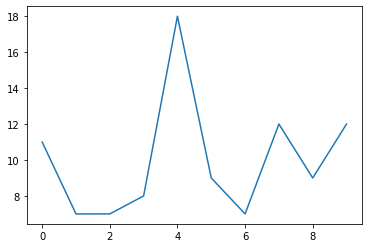

In [43]:
import matplotlib.pyplot as plt 
plt.plot(np.bincount(arr))

In [45]:
# 수우미양가 출력
scores = [60, 95, 77, 85, 50, 65, 92, 90, 70]
grade = ['가','양','미','우','수']
g = np.digitize(scores,bins = [60,70,80,90]) ## 인덱스 출력
res = [grade[i] for i in g]

In [46]:
res

['양', '수', '미', '우', '가', '양', '수', '수', '미']

### 데이터 재구조화 : pivot, pivot_table, stack, unstack, melt

In [47]:
# index col   val
# 1    매출1  100
# 1    매출1  200  
# 2    매입1  300
# 2    매입1  400
# =>재구조화
# index  매출1   매입1
#  1      100     300
#  2      200     400

df.pivot(index, columns, values)    
df.pivot_table(data, index, columns, values)    

In [49]:
data = pd.DataFrame({'cust_id': ['c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3'],
   'prod_cd': ['p1', 'p2', 'p3', 'p1', 'p2', 'p3', 'p1', 'p2', 'p3'],
   'grade' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B'],
   'pch_amt': [30, 10, 0, 40, 15, 30, 0, 0, 10]})
data

,cust_id,prod_cd,grade,pch_amt
0,c1,p1,A,30
1,c1,p2,A,10
2,c1,p3,A,0
3,c2,p1,A,40
4,c2,p2,A,15
5,c2,p3,A,30
6,c3,p1,B,0
7,c3,p2,B,0
8,c3,p3,B,10


df.pivot(index, columns, values)    
pivot < pivot_table 함수를 더 많이 사용

In [52]:
df_pivot = data.pivot(index = 'cust_id',columns = 'prod_cd',values = 'pch_amt')
df_pivot

prod_cd,p1,p2,p3
cust_id,,,
c1,30,10,0
c2,40,15,30
c3,0,0,10


In [53]:
df_pivot = pd.pivot_table(data,index = 'cust_id',columns = 'prod_cd',values='pch_amt')
df_pivot

prod_cd,p1,p2,p3
cust_id,,,
c1,30,10,0
c2,40,15,30
c3,0,0,10


### pivot과 pivot_table가 같아보이지만 기능적 자유도가 pivot_table이 더 높다

In [54]:
# data.pivot(index =['cust_id','grade'], columns = 'prod_cd',values = 'pch_amt') 에러 발생 ## 인덱스가 2개이상인 경우
pd.pivot_table(data,index= ['cust_id','grade'],columns = 'prod_cd',values='pch_amt')
## 컬럼의 개수가 2개 이상이어도 같은 경우 적용된다. 

,prod_cd,p1,p2,p3
cust_id,grade,,,
c1,A,30,10,0
c2,A,40,15,30
c3,B,0,0,10


In [55]:

# data.pivot(index ='grade',columns = 'prod_cd', values = 'pch_amt' ) # 오류!!  값이 겹치는 경우 연산하지 못한다.   

pd.pivot_table(data, index = 'grade',columns = 'prod_cd',values = 'pch_amt')

prod_cd,p1,p2,p3
grade,,,
A,35.0,12.5,15.0
B,0.0,0.0,10.0


In [56]:
pd.pivot_table(data, index = 'grade',columns = 'prod_cd',values = 'pch_amt',aggfunc=np.mean) # 평균 함수가 디폴트로 적용된다. 
# mean, sum, max 기본함수 적용 가능 

prod_cd,p1,p2,p3
grade,,,
A,35.0,12.5,15.0
B,0.0,0.0,10.0


In [58]:
pd.pivot_table(data,index = 'grade',columns= 'prod_cd',values = 'pch_amt',aggfunc=np.sum,margins=True)
# margin = True 모든 값에 함수를 적용한 값을 출력

prod_cd,p1,p2,p3,All
grade,,,,
A,70,25,30,125
B,0,0,10,10
All,70,25,40,135


In [59]:
# 다중 인덱스 생성
multindex = pd.MultiIndex.from_tuples([ 
    ('c1','2020'),('c1','2021'),('c2','2020'),('c2','2021')
])
multindex

MultiIndex([('c1', '2020'),
            ('c1', '2021'),
            ('c2', '2020'),
            ('c2', '2021')],
           )

In [61]:
data = pd.DataFrame(np.arange(16).reshape(4,4),index = multindex,columns = ['p1','p2','p3','p4'])
data

p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15

### 데이터 프레임 구조 변경 stack , unstack

In [64]:
datastack = data.stack()
datastack # 열 인덱스가 반시계 방향으로 90도 회전 

c1  2020  p1     0
          p2     1
          p3     2
          p4     3
    2021  p1     4
          p2     5
          p3     6
          p4     7
c2  2020  p1     8
          p2     9
          p3    10
          p4    11
    2021  p1    12
          p2    13
          p3    14
          p4    15
dtype: int32

In [67]:
# stack을 이용한 결측값 제거 
data.loc['c2','p4'] = np.nan 
data

p1  p2  p3   p4
c1 2020   0   1   2  3.0
   2021   4   5   6  7.0
c2 2020   8   9  10  NaN
   2021  12  13  14  NaN

In [68]:
data.stack(dropna=True) ## 2020,2021 p4 제거

c1  2020  p1     0.0
          p2     1.0
          p3     2.0
          p4     3.0
    2021  p1     4.0
          p2     5.0
          p3     6.0
          p4     7.0
c2  2020  p1     8.0
          p2     9.0
          p3    10.0
    2021  p1    12.0
          p2    13.0
          p3    14.0
dtype: float64

### unstack() 행 인덱스 시계방향으로 90도 회전

In [70]:
datastack.unstack() # == data 되돌아왔다 ( 가장 낮은 레벨의 인덱스부터 적용 )

p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15

In [74]:
datastack.unstack(level = 2) # 디폴트 레벨은 2이다. 

p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15

In [75]:
datastack.unstack(level = 1) 
# 대분류 level = 0 , 중분류 level = 1 , 소분류 leve1 = 2

2020  2021
c1 p1     0     4
   p2     1     5
   p3     2     6
   p4     3     7
c2 p1     8    12
   p2     9    13
   p3    10    14
   p4    11    15

In [80]:
df = datastack.unstack().reset_index() 
df## reset_index == 행인덱스가 열 인덱스로 온다 

,level_0,level_1,p1,p2,p3,p4
0,c1,2020,0,1,2,3
1,c1,2021,4,5,6,7
2,c2,2020,8,9,10,11
3,c2,2021,12,13,14,15


In [81]:
df.rename(columns = {'level_0':'c_id','level_1':'year'},inplace= True) # rename 중괄호 전 : 후 형태 
df

,c_id,year,p1,p2,p3,p4
0,c1,2020,0,1,2,3
1,c1,2021,4,5,6,7
2,c2,2020,8,9,10,11
3,c2,2021,12,13,14,15


### melt : 재구조화 id_var = 열이름 => 고정 //나머지 열 행인덱스화

In [82]:
data = pd.DataFrame({'cust_ID' : ['C_001', 'C_001', 'C_002', 'C_002'],
   'prd_CD' : ['P_001', 'P_002', 'P_001', 'P_002'],
   'pch_cnt' : [1, 2, 3, 4],
   'pch_amt' : [100, 200, 300, 400]})
data

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [83]:
pd.melt(data,id_vars=['cust_ID','prd_CD'])

,cust_ID,prd_CD,variable,value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [86]:
pd.melt(data,id_vars=['cust_ID','prd_CD'],value_name='pch_amt',var_name='pch_cnt') # 행 이름 변경 

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [91]:
pew = pd.read_csv('C:/Users/nyc15/Desktop/파이썬 공부/drive-download-20200703T073348Z-001/0910/padas_data/data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [92]:
pew_long=pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
pew_long.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [93]:
ebola=pd.read_csv("C:/Users/nyc15/Desktop/파이썬 공부/drive-download-20200703T073348Z-001/0910/padas_data/data//country_timeseries.csv")
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [94]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [96]:
ebola_long=pd.melt(ebola, id_vars=['Date','Day'])
ebola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [97]:
var_split=ebola_long.variable.str.split("_")
sta_value=var_split.str.get(0)
coun_value=var_split.str.get(1)

In [98]:
ebola_long['status']=sta_value
ebola_long['country']=coun_value
ebola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali
